In [ ]:
#Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [ ]:
#def load_and_explore_data (file_path):

df = pd.read_csv('/content/customer_support_tickets (1).csv')
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")




Dataset shape: 8469 rows, 17 columns


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
(df.head())

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
# Statistical summary
print(df.describe())

         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [ ]:
print(df.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


In [ ]:
#check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
 print("No missing values found!")
else:
 print(missing_values[missing_values > 0])

Resolution                      5700
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [ ]:
# Data Preprocessing
# Handling missing values
data = df.dropna()

In [ ]:
# Check your data types
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))
print(f"Numerical: {len(numerical_cols)} columns")
print(f"Categorical: {len(categorical_cols)} columns")

Numerical columns: ['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']
Categorical columns: ['Customer Name', 'Customer Email', 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution']
Numerical: 3 columns
Categorical: 13 columns


In [ ]:
# For numerical columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"{col}: Filled with median ({median_value})")

Customer Satisfaction Rating: Filled with median (3.0)


In [ ]:
# For categorical columns
for col in categorical_cols:
    if col != 'Customer Satisfaction Rating'and df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"{col}: Filled with mode ('{mode_value}')")

In [ ]:
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [ ]:
print("Encoding target variable...")
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
 label_encoders[column] = LabelEncoder()
 data[column] = label_encoders[column].fit_transform(data[column])

Encoding target variable...


In [ ]:
print("Preparing features and target...")

# Drop date and time related columns before encoding and splitting
columns_to_drop = ['Customer Name', 'Customer Email', 'Ticket ID', 'Resolution', 'Date of Purchase', 'First Response Time', 'Time to Resolution', 'Year-Month', 'Age Group']
df_processed = df.drop(columns=columns_to_drop)


# Re-apply encoding to the full df before splitting
label_encoders = {}
for column in df_processed.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_processed[column] = label_encoders[column].fit_transform(df_processed[column])

# Encode the target variable
label_encoders['Customer Satisfaction Rating'] = LabelEncoder()
df_processed['Customer Satisfaction Rating'] = label_encoders['Customer Satisfaction Rating'].fit_transform(df_processed['Customer Satisfaction Rating'])

X = df_processed.drop('Customer Satisfaction Rating', axis=1)
y = df_processed['Customer Satisfaction Rating']

print(f"Features: {X.shape[1]} columns")
print(f"Target: {len(y)} samples")

Preparing features and target...
Features: 9 columns
Target: 8469 samples


In [ ]:
# Identify common issues
common_issues = df['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


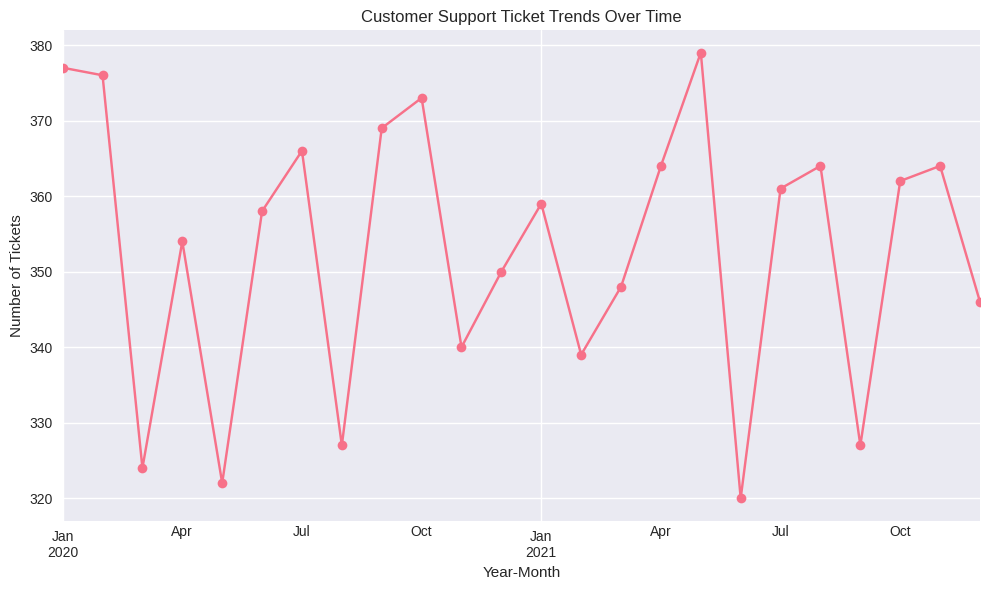

In [ ]:
#Plotting ticket trends over time

df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Year-Month'] = df['Date of Purchase'].dt.to_period('M')
ticket_trends = df.groupby('Year-Month').size()

plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

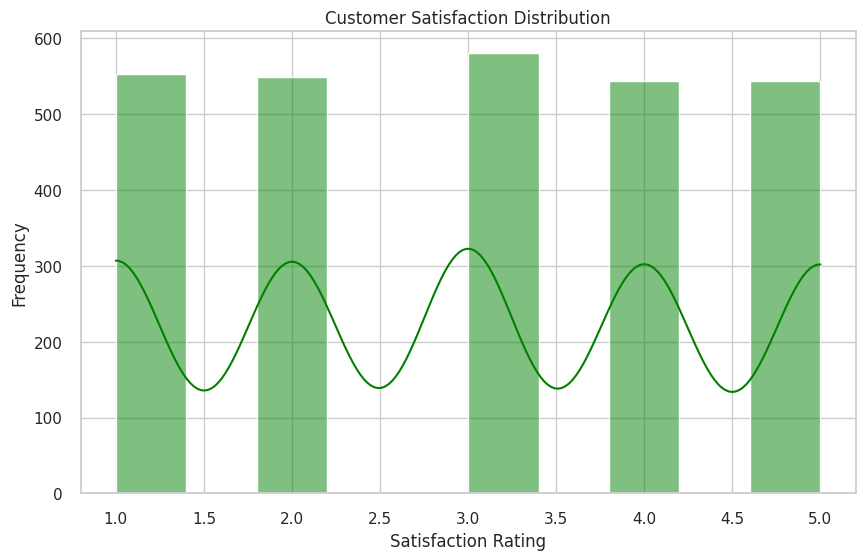

In [ ]:
# Set up the plotting aesthetics
sns.set(style="whitegrid")

#Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Satisfaction Rating'], bins=10, kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

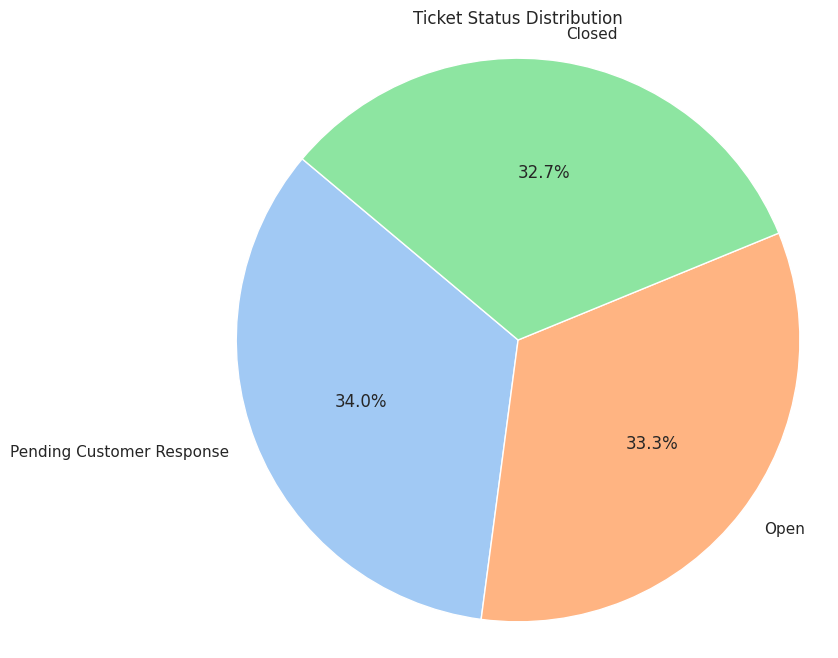

In [ ]:
#Ticket Status Distribution
ticket_status_distribution = df['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

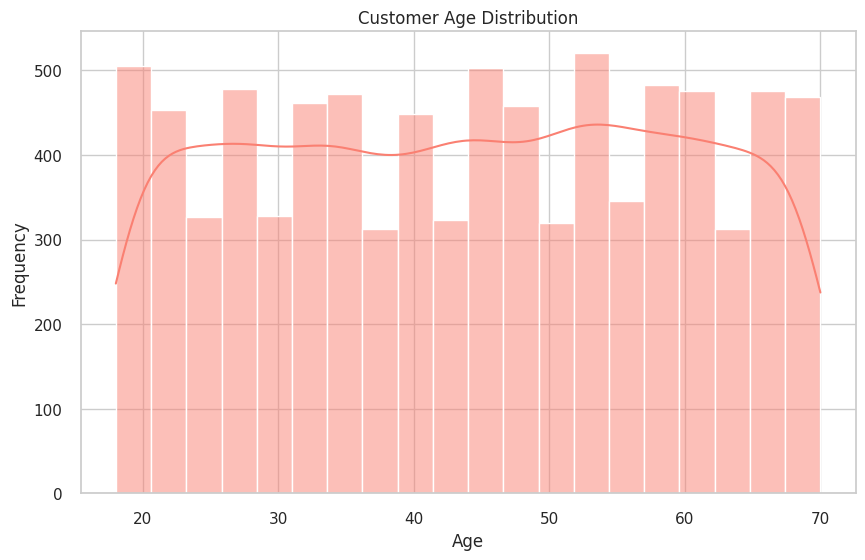

In [ ]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')

plt.ylabel('Frequency')
plt.show()

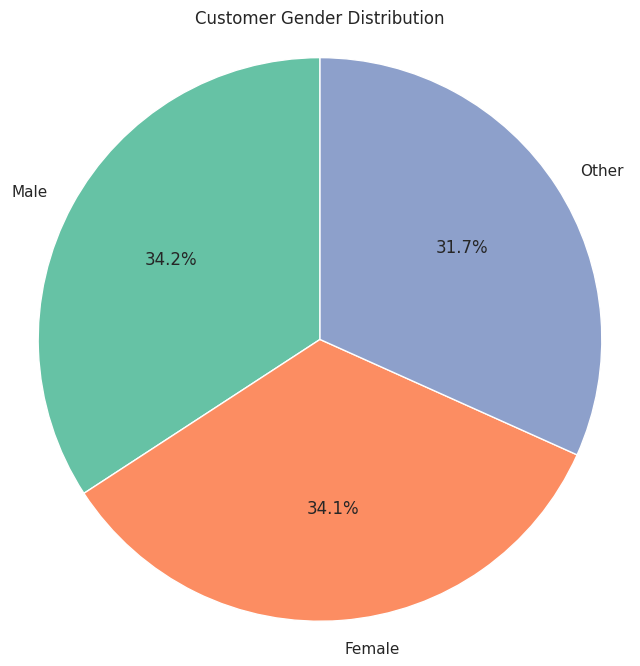

In [ ]:
#Customer Gender Distribution
customer_gender_distribution = df['Customer Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

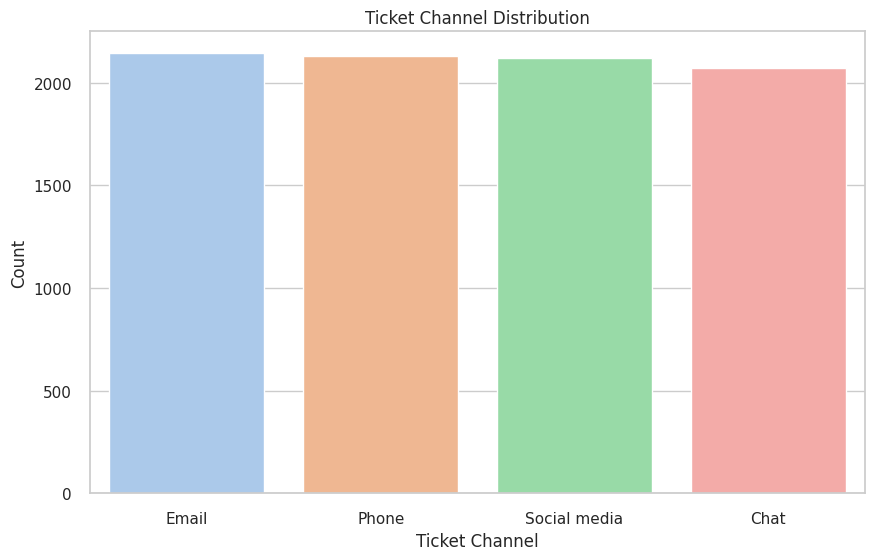

In [ ]:
#Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = df['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,

y=ticket_channel_distribution, palette='pastel')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.show()

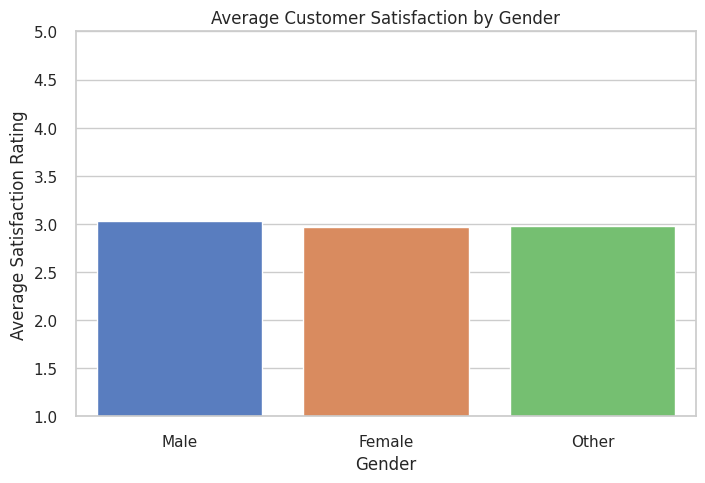

In [ ]:
# Chart 1: Average Customer Satisfaction by Gender (Bar Plot)

average_satisfaction = df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',
order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) # Adjust y-axis limit if needed
plt.show()

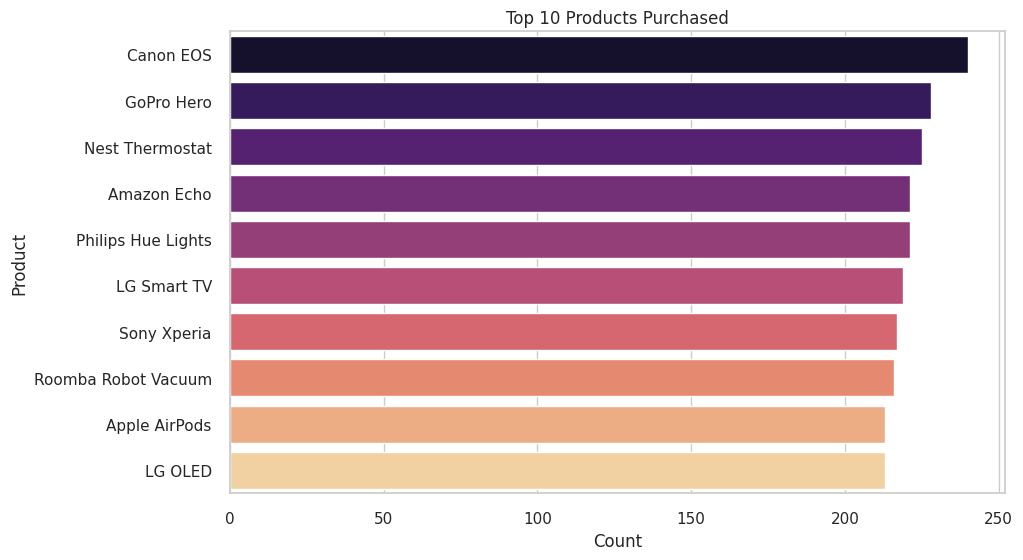

In [ ]:
#Product Purchased Distribution
plt.figure(figsize=(10, 6))
product_purchased_distribution = df['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

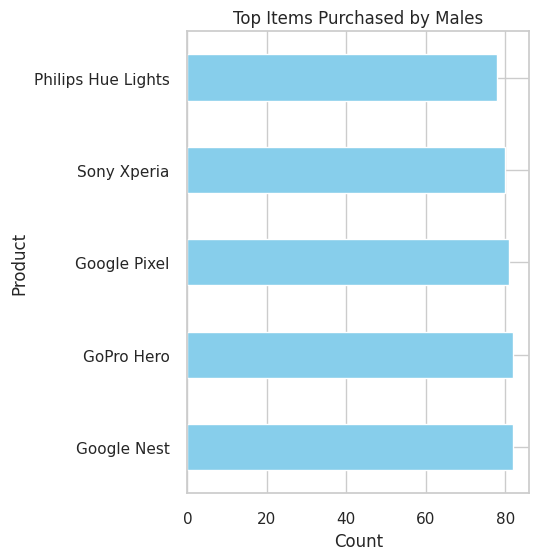

In [ ]:
# Chart 2: Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(15, 6))

# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = df[df['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')

plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

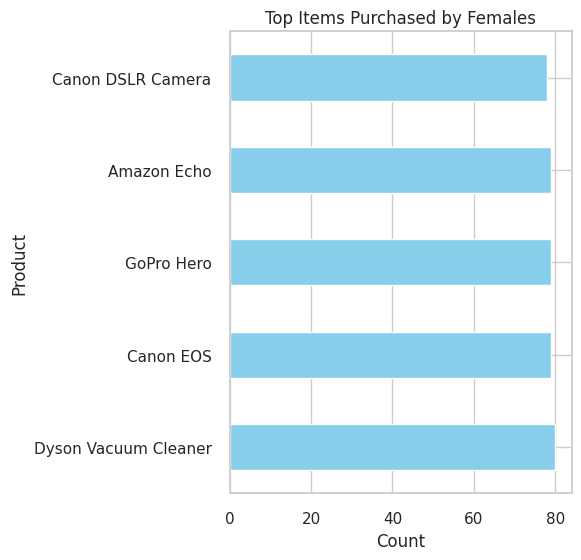

In [ ]:
plt.figure(figsize=(15, 6))

# Top Items Purchased by Females
plt.subplot(1, 3, 1)
top_items_female = df[df['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Females')

plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

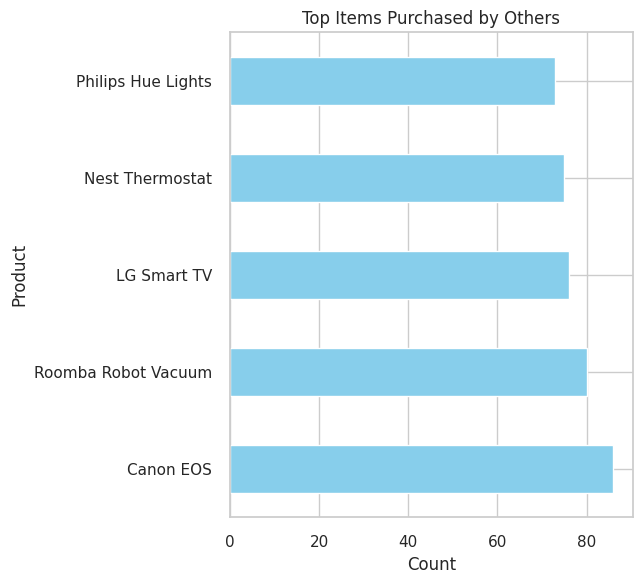

In [ ]:
plt.figure(figsize=(15, 6))

# Top Items Purchased by Other
plt.subplot(1, 3, 1)
top_items_other = df[df['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Others')

plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

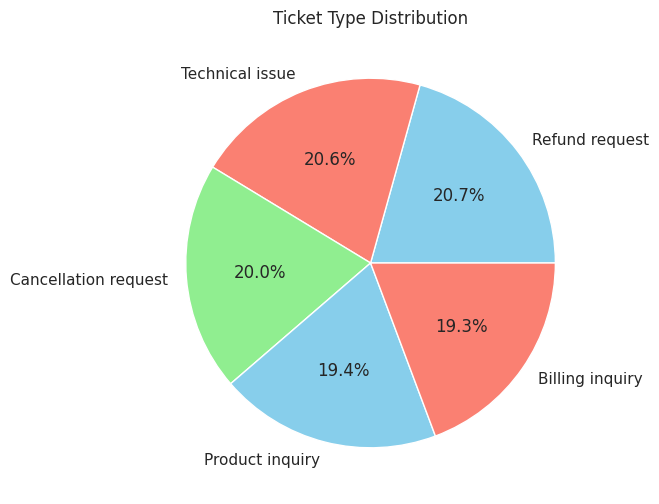

In [ ]:
# Count ticket types
ticket_type_distribution = df['Ticket Type'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

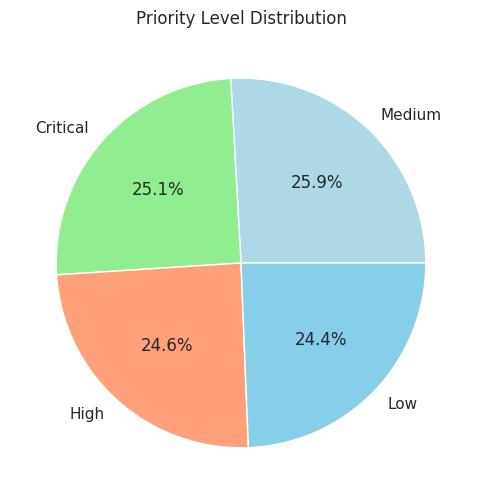

In [ ]:
# Count ticket priorities
priority_distribution = df['Ticket Priority'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')

plt.show()

In [ ]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']

In [ ]:
# Categorize customers into age groups

df['Age Group'] = pd.cut(df['Customer Age'], bins=bins,
labels=labels, right=False)

In [ ]:
# Calculate number of tickets raised by each age group
tickets_by_age_group = df.groupby('Age Group').size()

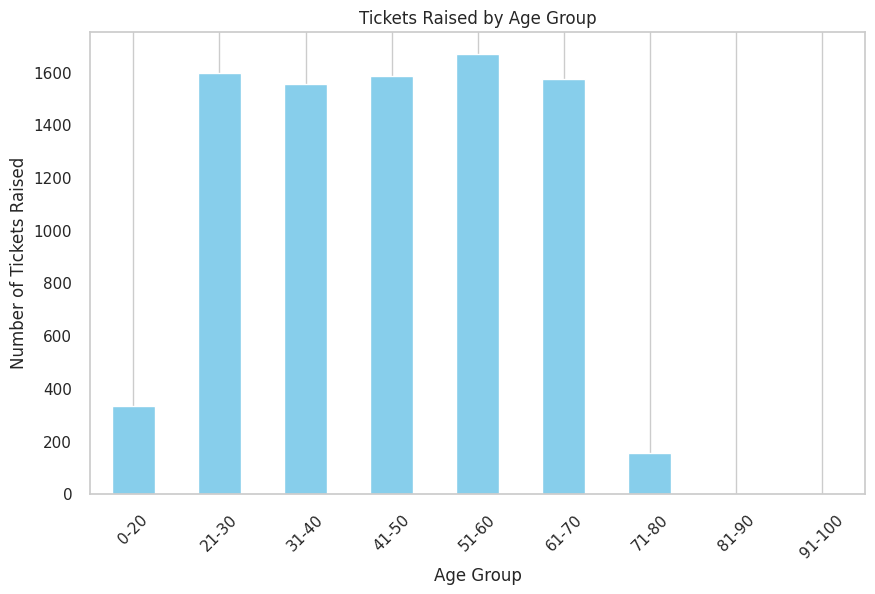

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

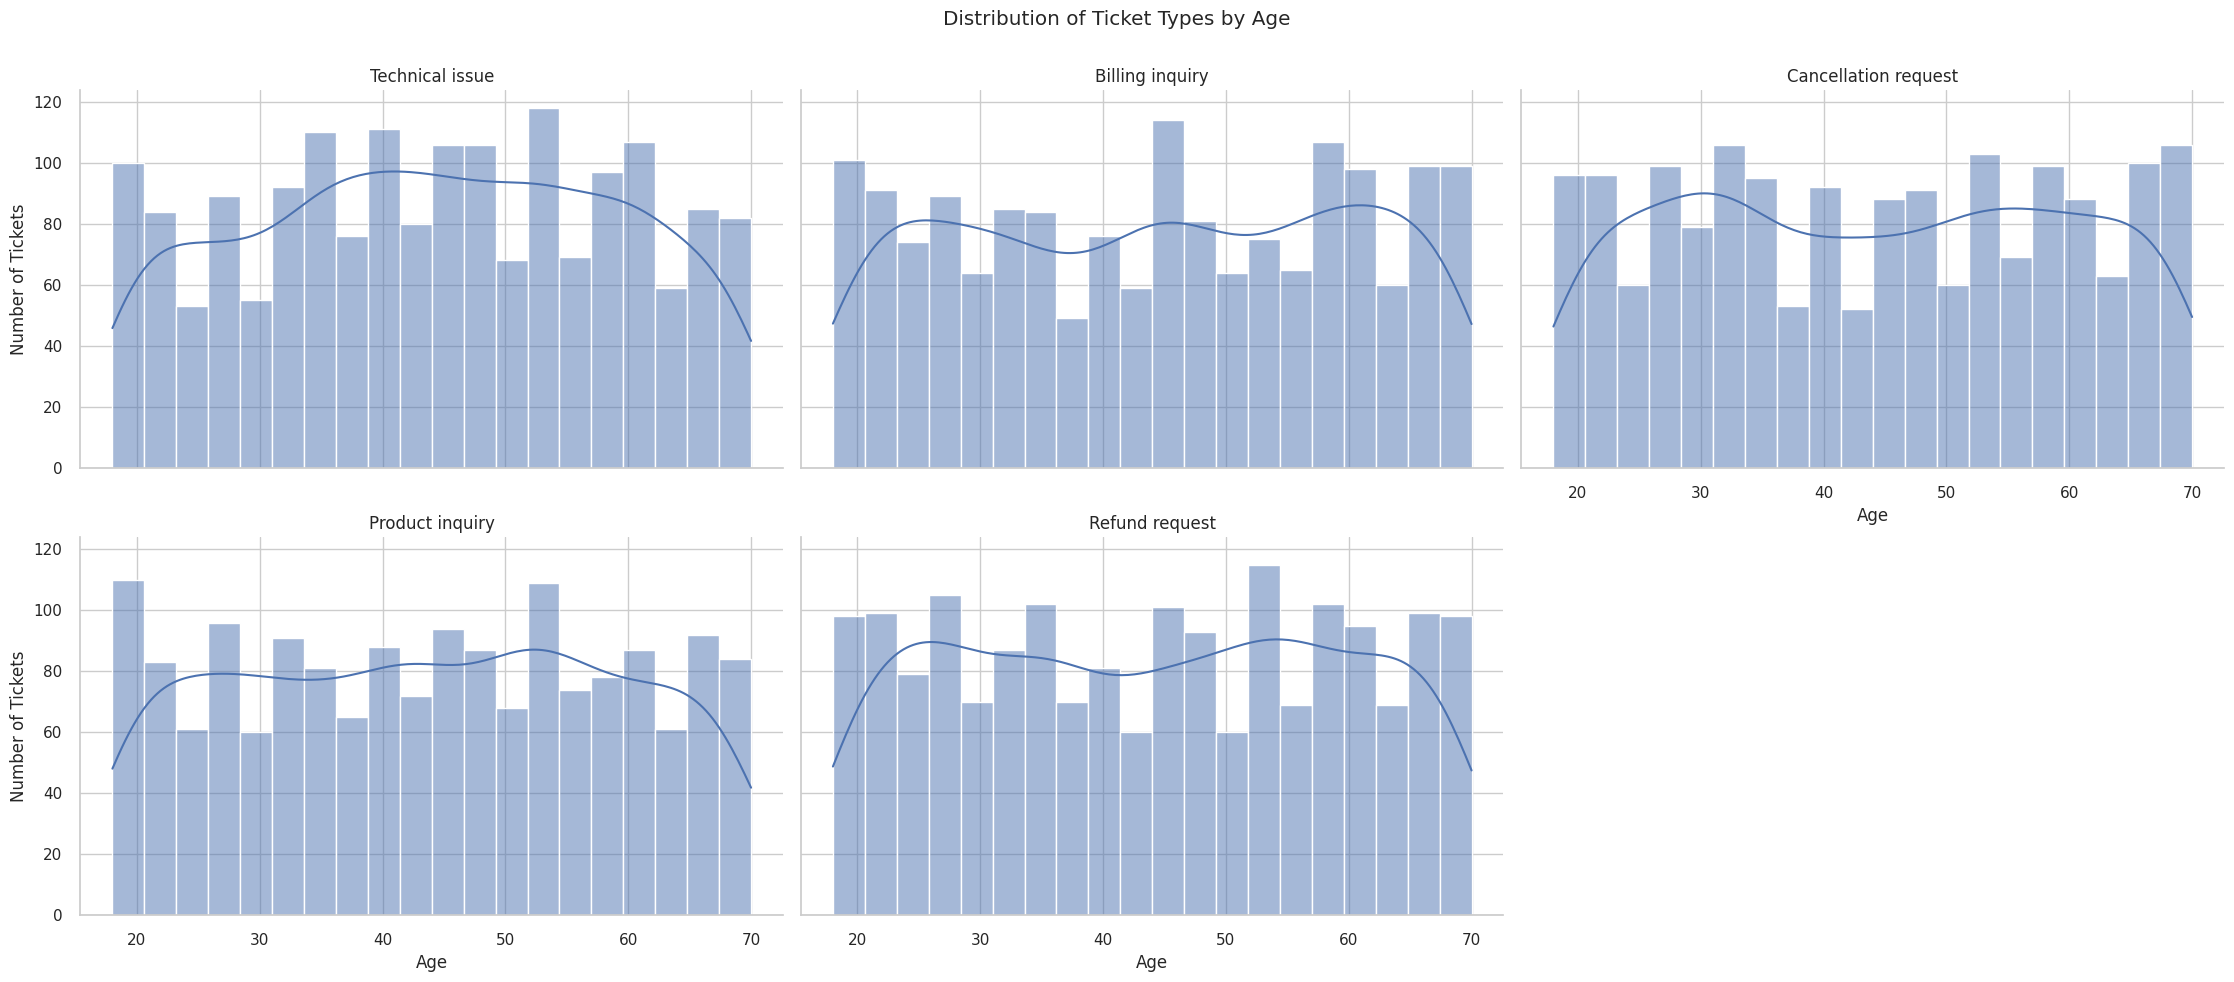

In [ ]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create a facet grid for each ticket type
g = sns.FacetGrid(df, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')

# Show plot
plt.show()

TRAIN MACHINE LEARNING MODELS

In [ ]:
def train_satisfaction_models(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  print(f"Training set: {X_train.shape[0]} samples")
  print(f"Testing set: {X_test.shape[0]} samples")

  return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
    # Call the function to get the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_satisfaction_models(X,y)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Training set: 6775 samples
Testing set: 1694 samples


In [ ]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7355371900826446
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.24      0.23       111
           1       0.12      0.10      0.11       110
           2       0.92      0.93      0.93      1256
           3       0.15      0.16      0.15       108
           4       0.22      0.20      0.21       109

    accuracy                           0.74      1694
   macro avg       0.33      0.33      0.33      1694
weighted avg       0.73      0.74      0.73      1694

Confusion Matrix:
 [[  27   19   25   24   16]
 [  24   11   33   23   19]
 [  28   18 1169   22   19]
 [  20   27   22   17   22]
 [  20   17   22   28   22]]


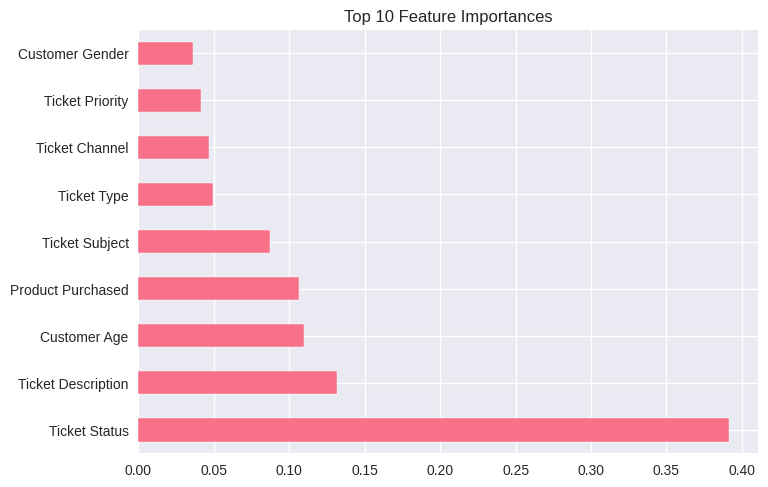

In [ ]:
# Visualization of Results
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()